In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import scipy.stats
from scipy.stats import chi2
from scipy.stats import norm
import math

In [ ]:
SLOTS=["red","black","green"]
R_SLOTS=18
B_SLOTS=18
G_SLOTS=2
SLOTS_NUM=[R_SLOTS,B_SLOTS,G_SLOTS]

r=18/38
b=18/38
g=1-r-b
person_porbab=[r,b,g]

In [ ]:
def casino(rslots, bslots, gslots,person_porbab, num_rounds=1000):
  SLOTS_NUM = [rslots, bslots, gslots]
  slots_porbab = [rslots / sum(SLOTS_NUM), bslots / sum(SLOTS_NUM), gslots / sum(SLOTS_NUM)]

  choices = np.random.choice(SLOTS, size=num_rounds, p=person_porbab)
  outcomes = np.random.choice(SLOTS, size=num_rounds, p=slots_porbab)

  moni_changes = np.where(choices == outcomes, 1, -1)
  moni_history = np.cumsum(moni_changes)
  moni_history = np.insert(moni_history, 0, 0)

  return moni_history

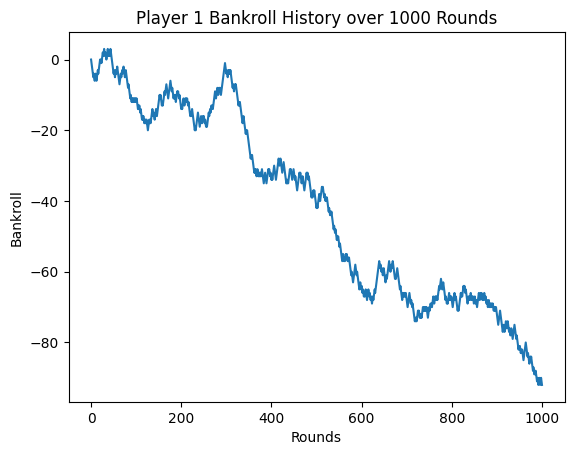

In [ ]:
player1_moni_history=casino(R_SLOTS,B_SLOTS,G_SLOTS,person_porbab, num_rounds=1000)
plt.plot(player1_moni_history)
plt.xlabel("Rounds")
plt.ylabel("Bankroll")
plt.title("Player 1 Bankroll History over 1000 Rounds")
plt.show()

Expected winnings=[32(r+b)-34]/38

To maximise our winnings, we can set r+b=1 and g=0

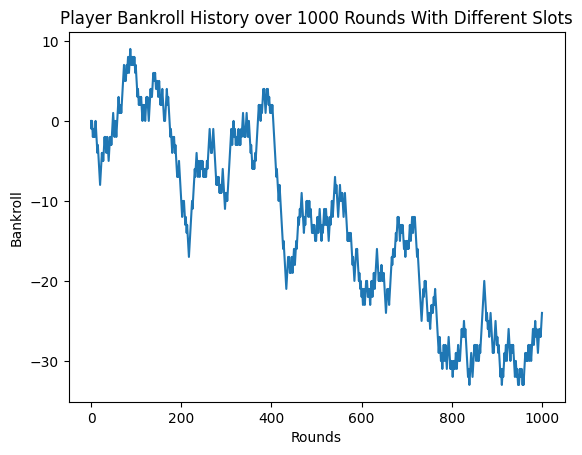

In [ ]:
player_alt_moni_history1=casino(rslots=18,bslots=18,gslots=2,person_porbab=[0.5,0.5,0], num_rounds=1000)
plt.plot(player_alt_moni_history1)
plt.xlabel("Rounds")
plt.ylabel("Bankroll")
plt.title("Player Bankroll History over 1000 Rounds With Different Slots")
plt.show()

Expected winnings=[32r+28b-34]/38

To maximise our winnings, we can set r=1, b=g=0

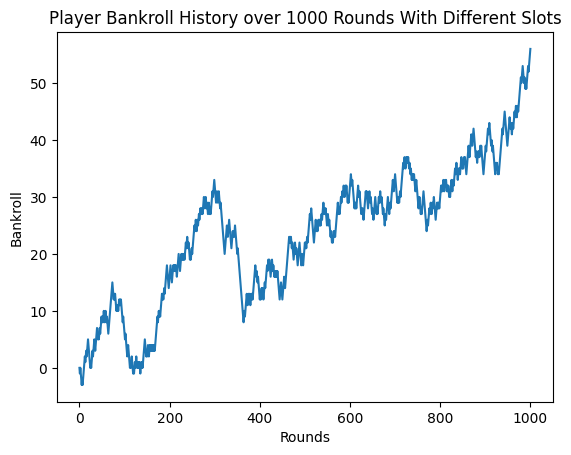

In [ ]:
player_alt_moni_history2=casino(rslots=20,bslots=16,gslots=2,person_porbab=[1,0,0], num_rounds=1000)
plt.plot(player_alt_moni_history2)
plt.xlabel("Rounds")
plt.ylabel("Bankroll")
plt.title("Player Bankroll History over 1000 Rounds With Different Slots")
plt.show()

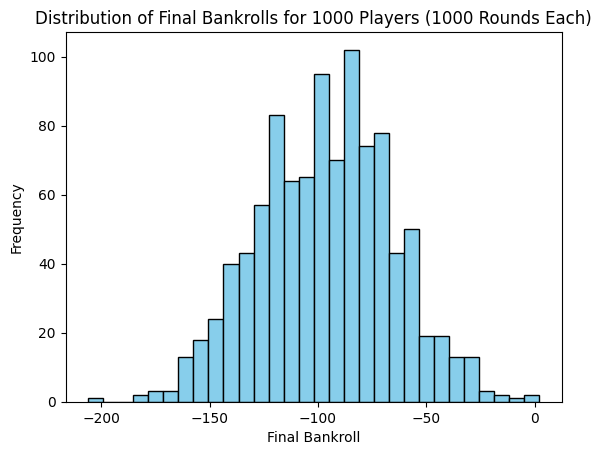

In [ ]:
player_bankrolls=[]
for i in range(1000):
  player_moni_history=casino(R_SLOTS,B_SLOTS,G_SLOTS,person_porbab, num_rounds=1000)
  player_bankrolls.append(player_moni_history[-1])

plt.hist(player_bankrolls, bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Final Bankroll")
plt.ylabel("Frequency")
plt.title("Distribution of Final Bankrolls for 1000 Players (1000 Rounds Each)")
plt.show()

Let p=probality that they match


E[X]=p(+1)+(1-p)(-1)=2p-1

E[X^2]=1

Var(X)=E[X^2]-E[X]^2=1-(2p-1)^2=4p(1-p)

σ(Sx)=sqrt(4Np(1-p))


In [ ]:
N = 1000
p = r*R_SLOTS/sum(SLOTS_NUM) + b*B_SLOTS/sum(SLOTS_NUM) + g*G_SLOTS/sum(SLOTS_NUM) # probability of winning
mu = N * (2*p - 1) # mean amount earned
sigma = np.sqrt(4 * N * p * (1 - p))

mu, sigma

(-96.9529085872577, np.float64(31.4738007478676))

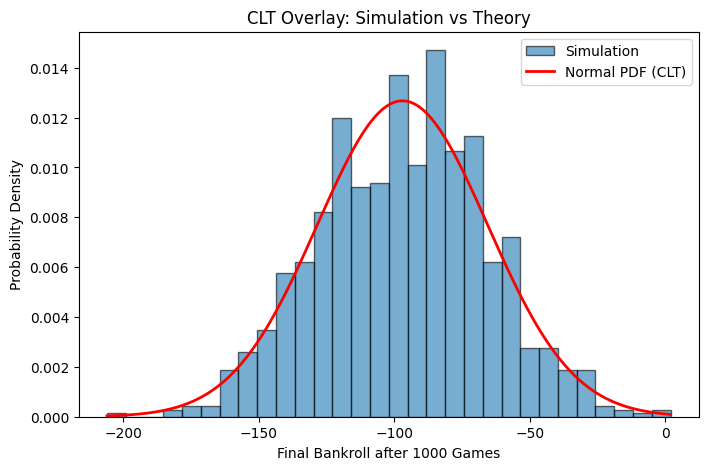

In [ ]:
player_bankrolls = np.array(player_bankrolls)
1
x = np.linspace(player_bankrolls.min(), player_bankrolls.max(), 500)
pdf = norm.pdf(x, mu, sigma)

plt.figure(figsize=(8,5))

plt.hist(player_bankrolls,bins=30,density=True,alpha=0.6,edgecolor='black',label='Simulation')

plt.plot(x,pdf,'r',linewidth=2,label='Normal PDF (CLT)')

plt.xlabel("Final Bankroll after 1000 Games")
plt.ylabel("Probability Density")
plt.title("CLT Overlay: Simulation vs Theory")

plt.legend()
plt.show()



**Part** **B**

Quality Control (Sampling Distributions)


In [ ]:
N = 100_000  # Number of samples

#Mean =1000
#Variance =25
factory_output = np.random.normal(loc=1000, scale=5, size=N)

print(f"Mean of factory output: {factory_output.mean():.0f}")
print(f"Standard deviation of factory output: {factory_output.std():.0f}")

Mean of factory output: 1000
Standard deviation of factory output: 5


In [ ]:
n = 30  # Sample size
K = 1000 # Number of repetitions

sample_variances = []

for _ in range(K):
    # random sample of size n from the population
    sample = np.random.choice(factory_output, size=n, replace=False)

    # Sample Variance (S2) for this batch (ddof=1 for sampled data)
    s2 = np.var(sample, ddof=1)

    sample_variances.append(s2)

sample_variances = [float(x) for x in sample_variances]

print(f"First 5 sample variances: {sample_variances[:5]}")
print(f"Mean of sample variances: {np.mean(sample_variances):.2f}")
print(f"Standard deviation of sample variances: {np.std(sample_variances):.2f}")

First 5 sample variances: [38.050107384673254, 27.26669361009446, 15.41860992306239, 13.433762742983882, 27.344572112920766]
Mean of sample variances: 25.40
Standard deviation of sample variances: 6.86


First 5 Chi-Square statistics: ['44.14', '31.63', '17.89', '15.58', '31.72']
Mean of Chi-Square statistics: 29.47
theoritical Mean of Chi-Square statistics: 29.00
Standard deviation of Chi-Square statistics: 7.96
theoritical Standard deviation of Chi-Square statistics: 7.615773105863909


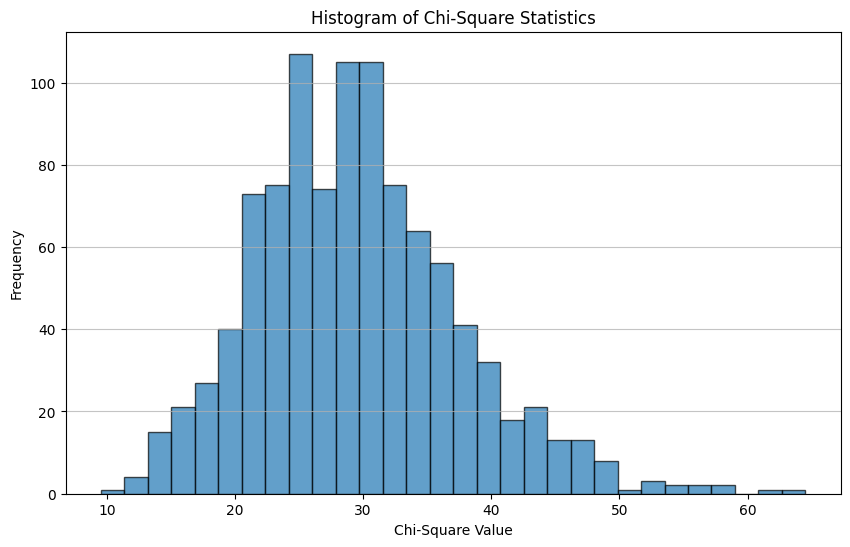

In [ ]:
population_variance = 25

# n = 30

# Transform sample variances into Chi-Square statistics
chi_square_stats = []
for s2 in sample_variances:
    # Y = (n - 1) * S2 / σ^2
    Y = (n - 1) * s2 / population_variance
    chi_square_stats.append(Y)


print(f"First 5 Chi-Square statistics: {[f'{x:.2f}' for x in chi_square_stats[:5]]}")
print(f"Mean of Chi-Square statistics: {np.mean(chi_square_stats):.2f}")
print(f"theoritical Mean of Chi-Square statistics: {n-1:.2f}")
print(f"Standard deviation of Chi-Square statistics: {np.std(chi_square_stats):.2f}")
print(f"theoritical Standard deviation of Chi-Square statistics: {math.sqrt(2*(n-1))}")

# Plot a histogram of these transformed values
plt.figure(figsize=(10, 6))
plt.hist(chi_square_stats, bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Chi-Square Statistics')
plt.xlabel('Chi-Square Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

$$
f(x) = \frac{1}{2^{k/2}\,\Gamma\!\left(\frac{k}{2}\right)}
x^{\frac{k}{2}-1}
e^{-\frac{x}{2}}, \quad x \ge 0
$$
theoritical chi square stats equation


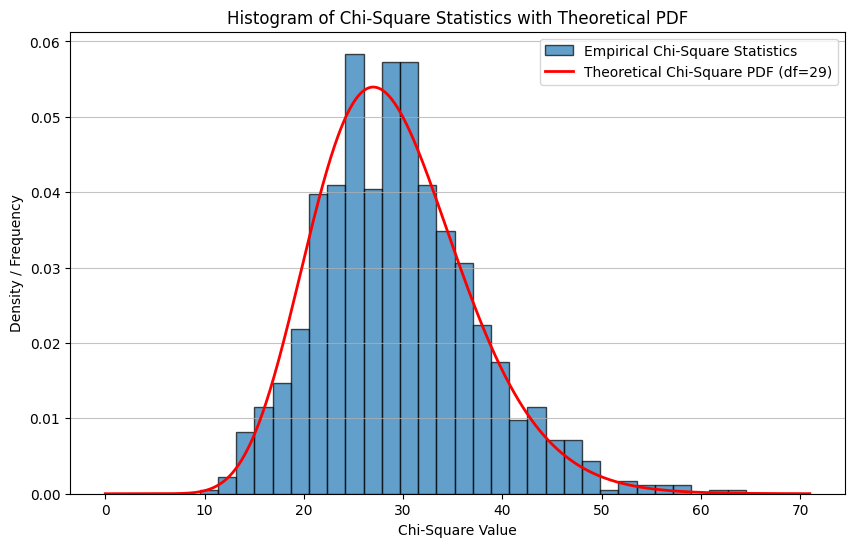

In [ ]:
# Degrees of freedom (n-1)
df = n - 1

# Create a range of x-values for the theoretical PDF
x = np.linspace(0, max(chi_square_stats) * 1.1, 1000)

# theoretical Chi-Square PDF values
pdf = chi2.pdf(x, df)


plt.figure(figsize=(10, 6))
plt.hist(chi_square_stats, bins=30, edgecolor='black', alpha=0.7, density=True, label='Empirical Chi-Square Statistics') # Added density=True for comparison with PDF

# Overlay the theoretical PDF
plt.plot(x, pdf, color='red', linewidth=2, label=f'Theoretical Chi-Square PDF (df={df})')

plt.title('Histogram of Chi-Square Statistics with Theoretical PDF')
plt.xlabel('Chi-Square Value')
plt.ylabel('Density / Frequency')
plt.grid(axis='y', alpha=0.75)
plt.legend()
plt.show()

In Class Component:

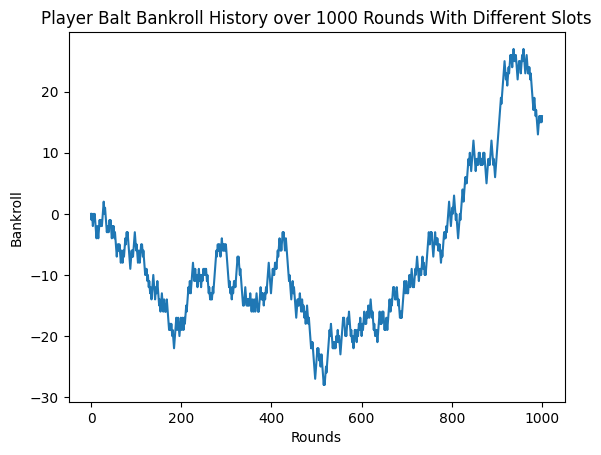

In [ ]:
player_balt=casino(rslots=18,bslots=16,gslots=2,person_porbab=[1,0,0], num_rounds=1000)
player_balt
plt.plot(player_balt)
plt.xlabel("Rounds")
plt.ylabel("Bankroll")
plt.title("Player Balt Bankroll History over 1000 Rounds With Different Slots")
plt.show()


 Z statistic for one sample (n=30): 23.47
Degrees of freedom for Z: 30


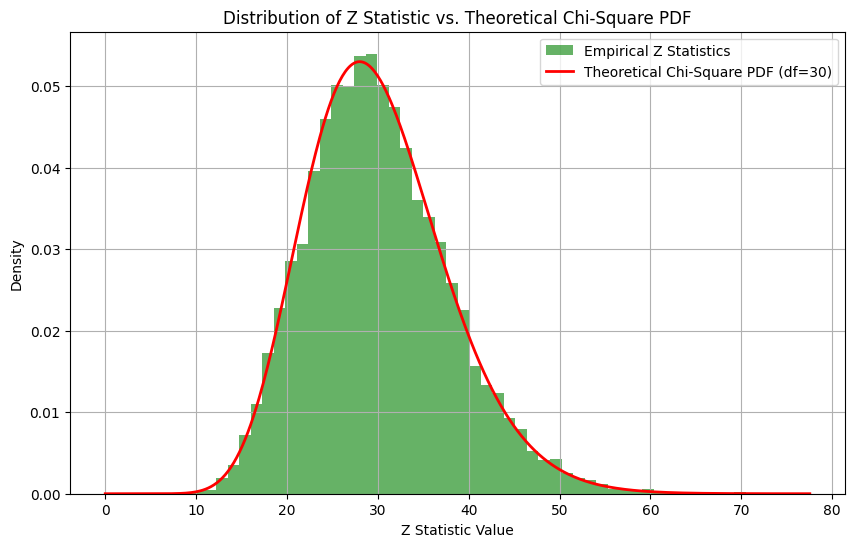

In [ ]:
population_mean = 1000  # μ
population_variance = 25 # σ^2
population_std = np.sqrt(population_variance)


sample_from_population = np.random.choice(factory_output, size=n, replace=False)

# Z = sum((Xi - μ)^2) / σ^2
Z_statistic = np.sum(((sample_from_population - population_mean) / population_std)**2)

print(f"\n Z statistic for one sample (n={n}): {Z_statistic:.2f}")
print(f"Degrees of freedom for Z: {n}")


K_z = 10000  # Number of Z statistics
Z_statistics_list = []

for _ in range(K_z):
    # Draw a new sample for each iteration
    sample_k = np.random.choice(factory_output, size=n, replace=False)
    Z_k = np.sum(((sample_k - population_mean) / population_std)**2)
    Z_statistics_list.append(Z_k)


plt.figure(figsize=(10, 6))
plt.hist(Z_statistics_list, bins=50, density=True, alpha=0.6, color='green', label='Empirical Z Statistics')


df_Z = n  # Degrees of freedom for Z is n
x_chi2 = np.linspace(0, max(Z_statistics_list) * 1.1, 500) # Range for plotting
pdf_chi2 = chi2.pdf(x_chi2, df_Z)
plt.plot(x_chi2, pdf_chi2, 'r-', lw=2, label=f'Theoretical Chi-Square PDF (df={df_Z})')

plt.title('Distribution of Z Statistic vs. Theoretical Chi-Square PDF')
plt.xlabel('Z Statistic Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
gamesh=pd.read_fwf('/content/sample_data/video.data')
print(list(gamesh.columns))
print(gamesh['time like'])

# gamesh=gamesh[gamesh['time like']>0]

['time like', 'where', 'freq', 'busy', 'educ', 'sex', 'age', 'home', 'math', 'work', 'own', 'cdrom', 'email', 'grade']
0     2    3
1     0    3
2     0    3
3     0.5  3
4     0    3
       ...  
86    2    3
87    5    3
88    0    2
89    3    3
90    0    3
Name: time like, Length: 91, dtype: object


In [ ]:
gamesh=pd.read_fwf('/content/sample_data/video.data')
gamesh[['time', 'like']] = gamesh['time like'].str.split(expand=True)
gamesh['time'] = pd.to_numeric(gamesh['time'],downcast="float", errors='coerce')
print(list(gamesh.columns))
print(type(gamesh['time'][0]))
print(gamesh.head())

['time like', 'where', 'freq', 'busy', 'educ', 'sex', 'age', 'home', 'math', 'work', 'own', 'cdrom', 'email', 'grade', 'time', 'like']
<class 'numpy.float32'>
  time like  where  freq  busy  educ  sex  age  home  math  work  own  cdrom  \
0    2    3      3     2     0     1    0   19     1     0    10    1      0   
1    0    3      3     3     0     0    0   18     1     1     0    1      1   
2    0    3      1     3     0     0    1   19     1     0     0    1      0   
3    0.5  3      3     3     0     1    0   19     1     0     0    1      0   
4    0    3      3     4     0     1    0   19     1     1     0    0      0   

   email  grade  time like  
0      1      4   2.0    3  
1      1      2   0.0    3  
2      1      3   0.0    3  
3      1      3   0.5    3  
4      1      3   0.0    3  


TypeError: 'value' must be an instance of str or bytes, not a numpy.int64

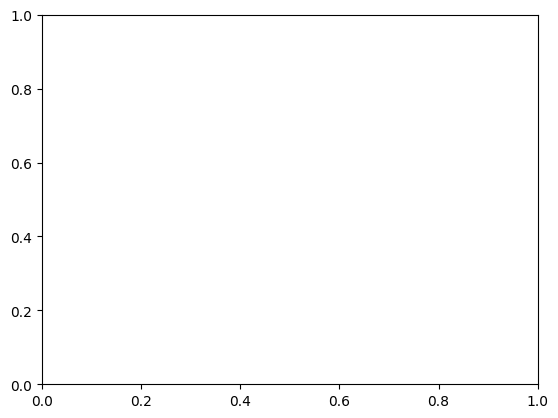

In [ ]:
plt.hist(gamesh.loc[0],bins=100,edgecolor='black')
plt.show()

# plt.hist(chi_square_stats, bins=30, edgecolor='black', alpha=0.7, density=True, label='Empirical Chi-Square Statistics')